##Decision Tree
Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

In [6]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [7]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [8]:
fraud.tail()

Undergrad Marital.Status  Taxable.Income  City.Population  \
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO

In [11]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [12]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [13]:
print(fraud)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [14]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [16]:
fraud.tail(10)

Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
590           43018            85195               14              0   
591           27394           132859               18              1   
592           68152            75143               16              1   
593           84775           131963               10              0   
594           47364            97526                9              0   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  TaxInc_Good  
590                       1                      0          1            1  
591                       0                      1          1            0  
592                       0                      1          0            1  
593                       0                      0          1            1  
594                       1                      0          1            1  
595                       0                      0          1            1  
596                       0                      0          1            1  
597                       0                      0          1            1  
598                       1                      0          0            1  
599                       0                      0          0            1

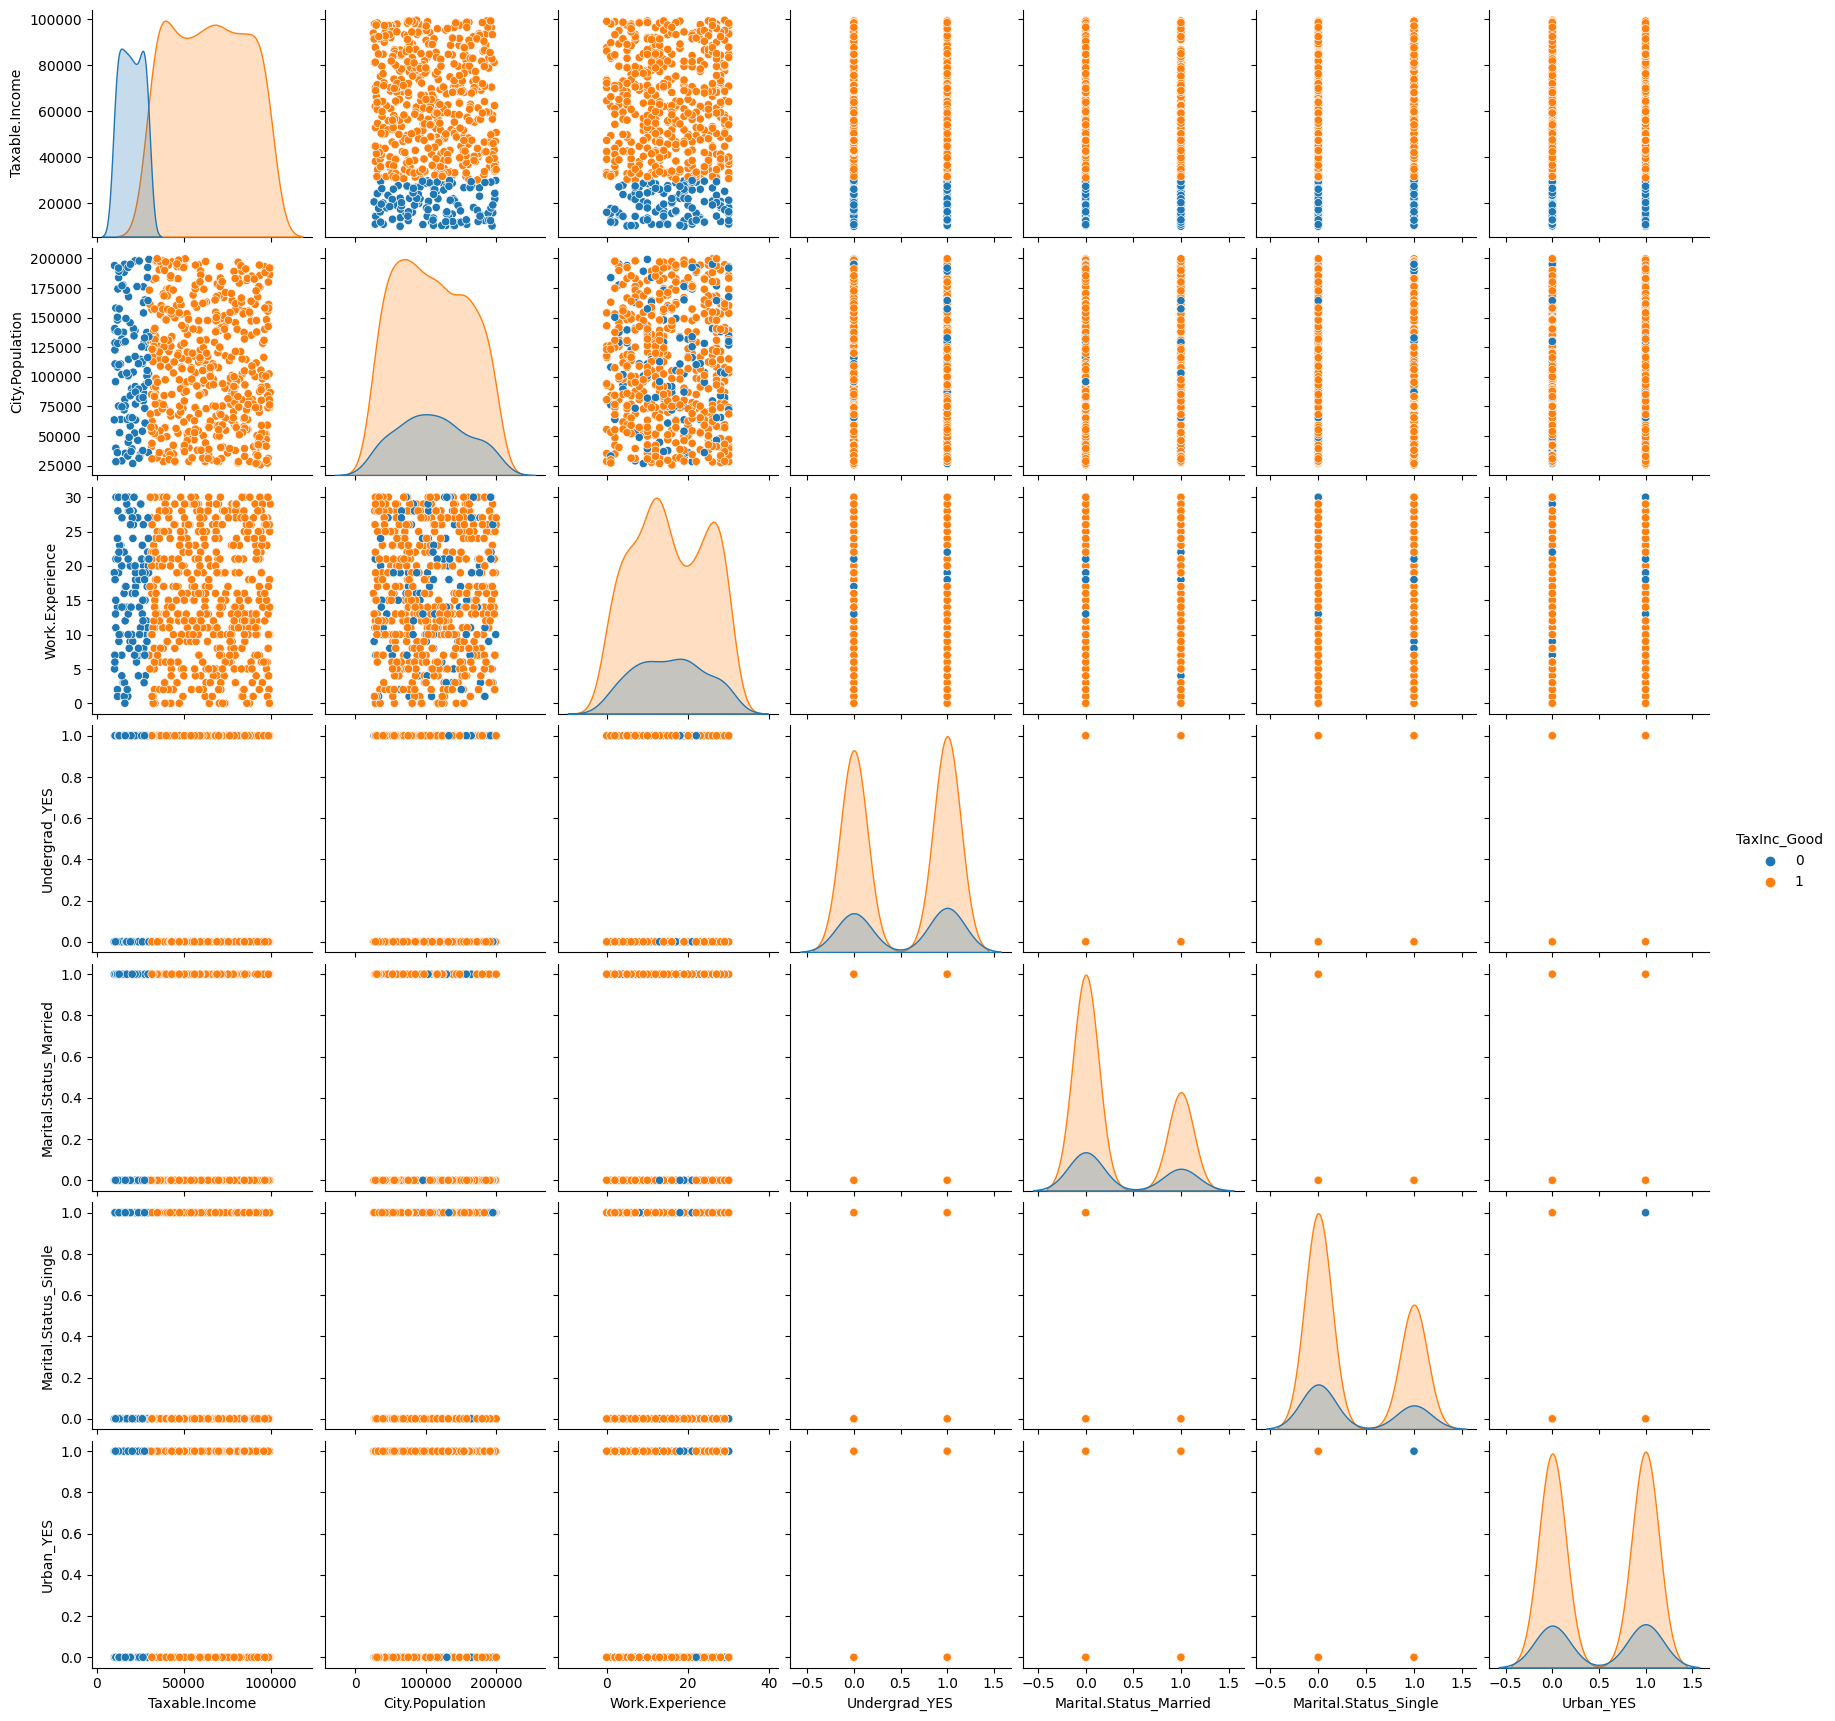

In [17]:
import seaborn as sns
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

In [18]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm.tail(10)

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
590         0.341473         0.466667            0.0                     1.0   
591         0.615406         0.600000            1.0                     0.0   
592         0.283703         0.533333            1.0                     0.0   
593         0.610256         0.333333            0.0                     0.0   
594         0.412341         0.300000            0.0                     1.0   
595         0.078811         0.233333            1.0                     0.0   
596         0.170058         0.066667            1.0                     0.0   
597         0.737240         0.000000            0.0                     0.0   
598         0.886810         0.566667            1.0                     1.0   
599         0.760683         0.533333            0.0                     0.0   

     Marital.Status_Single  Urban_YES  TaxInc_Good  
590                    0.0        1.0          1.0  
591                    1.0        1.0          0.0  
592                    1.0        0.0          1.0  
593                    0.0        1.0          1.0  
594                    0.0        1.0          1.0  
595                    0.0        1.0          1.0  
596                    0.0        1.0          1.0  
597                    0.0        1.0          1.0  
598                    0.0        0.0          1.0  
599                    0.0        0.0          1.0

In [21]:
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, y_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [27]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [28]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [30]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [35]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [31]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [37]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [39]:
model.estimators_
model.classes_
model.n_classes_

2

In [40]:
model.n_outputs_

1

In [41]:
model.oob_score_

0.5145833333333333

In [44]:
prediction = model.predict(x_train)
prediction

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.975

In [47]:
np.mean(prediction == y_train)

0.975

In [48]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [49]:
pred_test = model.predict(x_test)

In [50]:
acc_test =accuracy_score(y_test,pred_test)

In [51]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [52]:
tree = model.estimators_[5]

In [54]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target)

In [55]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

## Decision Tree

In [56]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
from sklearn import tree

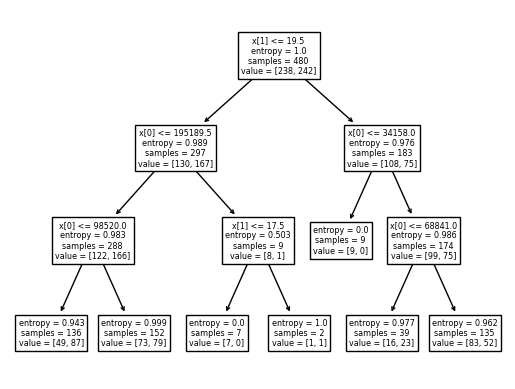

In [58]:
tree.plot_tree(model);

In [60]:
colnames = list(fraud.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

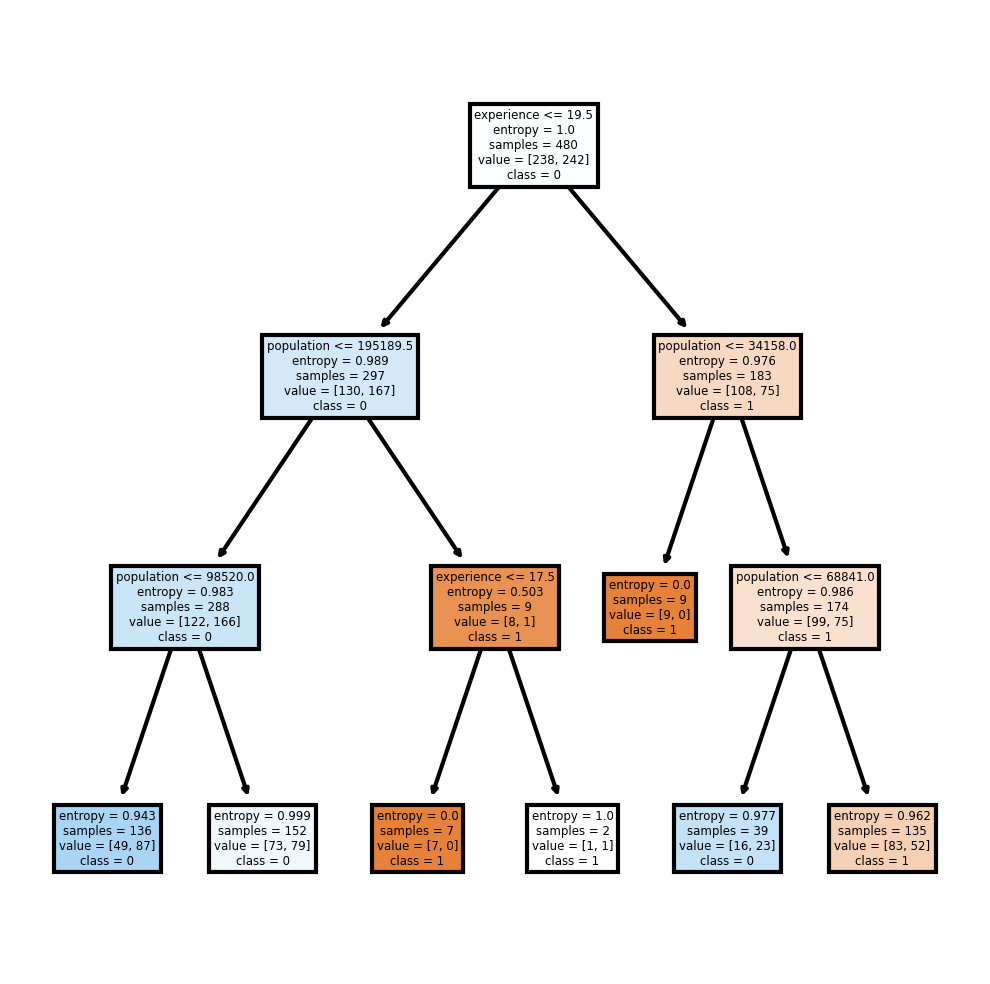

In [61]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [62]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    91
0    29
dtype: int64

In [63]:
preds

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [64]:
pd.crosstab(y_test,preds)

col_0       0   1
Urban_YES        
0          12  48
1          17  43

In [65]:
np.mean(preds==y_test)

0.4583333333333333

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [67]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.4583333333333333

# Decision Tree Regression

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [73]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [74]:
model.score(X_test,y_test)

-0.8931902985074629